# Credit Card Fraud

Link to Kaggle Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Let us start by importing the required files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from xgboost import XGBClassifier
from xgboost import Booster
from xgboost import DMatrix

Now let us read the CSV file

In [ ]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Let us now look at the number of fradulent cases as compared to the number of legitimate cases

In [ ]:
# Checking for unbalanced classes

nf = data[data["Class"] == 0]
f = data[data["Class"] == 1]

print("Fraudulent counts:", len(f))
print("Non fraudulent counts:", len(nf))

print("Percentage of fraudulent transactions:", round(len(f)/len(data)*100,3),"%")

Fraudulent counts: 492
Non fraudulent counts: 284315
Percentage of fraudulent transactions: 0.173 %


We can see that there are significantly lesser fradulent transactions as comparede to legitimate transactions

Let us try to visualize this

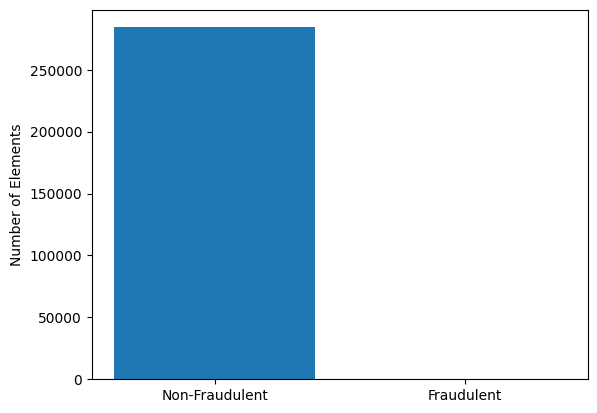

In [ ]:
heights = [len(nf), len(f)]
labels = ['Non-Fraudulent', 'Fraudulent']
plt.bar(labels, heights)
plt.ylabel("Number of Elements")
plt.show()

We can see that the number of fradulent cases are significantly smaller than legitmate cases.
Let us try visualising this as a pie chart

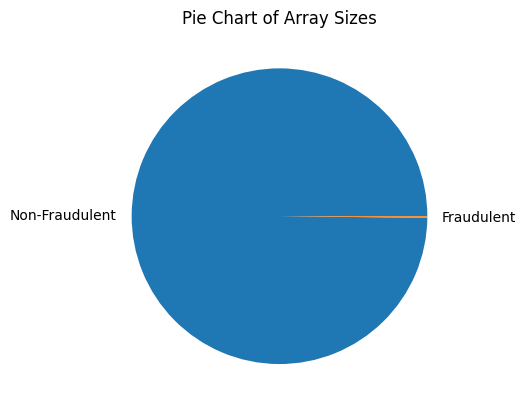

In [ ]:
plt.pie(heights, labels=labels)
plt.title("Pie Chart of Array Sizes")
plt.show()

We can see it a little better here, the representation of the fraudulent cases as part of the dataset

We will now try to analyse the data, to see what kind of values we have

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Notice how almost all the features have their mean close to 0. The only features having their mean much greater than 0 are Amount and Time

Let us convert the time to hours to make it a little more convinient for us

In [ ]:
data["Hour"] = ((data["Time"]//3600)%24).astype(int)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23


Let us now individually analyse the trends of the fraudulent data and the legitimate data

First let us look at the time data

In [ ]:
legal_hr_data = pd.DataFrame()
fraud_hr_data = pd.DataFrame()
legal_hr_data["legal"] = data[data["Class"] == 0]["Hour"].describe()
fraud_hr_data["fraud"] = data[data["Class"] == 1]["Hour"].describe()
df = pd.DataFrame([legal_hr_data["legal"], fraud_hr_data["fraud"]])
df

,count,mean,std,min,25%,50%,75%,max
legal,284315.0,14.050623,5.833478,0.0,10.0,15.0,19.0,23.0
fraud,492.0,11.646341,6.663342,0.0,5.0,12.0,17.0,23.0


We can see that the fraudulent data has a much smaller count, relatively lower mean and slightly higher standard deviation.

Let us look at the same for the Amount of the transaction

In [ ]:
legal_amt_data = pd.DataFrame()
fraud_amt_data = pd.DataFrame()
legal_amt_data["legal"] = data[data["Class"] == 0]["Amount"].describe()
fraud_amt_data["fraud"] = data[data["Class"] == 1]["Amount"].describe()
df = pd.DataFrame([legal_amt_data["legal"], fraud_amt_data["fraud"]])
df

,count,mean,std,min,25%,50%,75%,max
legal,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
fraud,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


Once again we can see that the Fradulent data has a much lower count, but here we can notice that there is a pretty significant difference in the mean values, with the fraudulent data having a higher mean

Now since the Amount and Time were much higher compared to the other variables, let us centre the data about the mean

In [ ]:
centred_data = data
centred_data["Amount"] = centred_data["Amount"] - centred_data["Amount"].mean()
centred_data["Hour"] = centred_data["Hour"] - centred_data["Hour"].mean()

centred_data.drop('Time', axis = 1, inplace = True)

Let us also drop the time column as from now on, we will be doing our analysis on the Hours column

In [ ]:
centred_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,5.926898e-15,0.001727,-7.664093e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,2.501201e+02,0.041527,5.835854e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-8.834962e+01,0.000000,-1.404647e+01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-8.274962e+01,0.000000,-4.046470e+00
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-6.634962e+01,0.000000,9.535299e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-1.118462e+01,0.000000,4.953530e+00
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,2.560281e+04,1.000000,8.953530e+00


We will now create the training set and the test set from the data

In [ ]:
dftrain, dftest = train_test_split(data, test_size=0.2, random_state=42, stratify=data[["Class"]])

In [ ]:
train_frd = (len(dftrain[dftrain["Class"] == 1]))
print("Fraudulent percentage in training data", round((train_frd/(len(dftrain)))*100,3))
test_frd = (len(dftest[dftest["Class"] == 1]))
print("Fraudulent percentage in testing data", round((test_frd/(len(dftest)))*100,3))

Fraudulent percentage in training data 0.173
Fraudulent percentage in testing data 0.172


We can see that the percentage of fraudulent cases in both the training set and the test set are a good representation of the whole dataset

In [ ]:
dftrain

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-81.029619,0,5.95353
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-85.359619,0,-4.04647
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,86.750381,0,-3.04647
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-82.249619,0,-2.04647
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-2.249619,0,1.95353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,...,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,-82.359619,0,2.95353
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,-51.359619,0,1.95353
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,-42.929619,0,-5.04647
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,...,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,-87.459619,0,-8.04647


Let us now prepare the X and y data

In [ ]:
y_train = dftrain["Class"]
X_train = dftrain.drop("Class", axis = 1)
y_test = dftest["Class"]
X_test = dftest.drop("Class", axis = 1)

y_train

265518    0
180305    0
42664     0
198723    0
82325     0
         ..
233802    0
85418     0
29062     0
13766     0
17677     0
Name: Class, Length: 227845, dtype: int64

Here there is a huge label imbalance. We can resolve this in 2 ways:

1) Undersampling - Remove non fraudulent cases to get a balanced dataset of relatively equal number of fraudulent and legitamate cases

2) Oversampling - Synthesise new data for the fraudulent cases to have a balanced dataset

If we were to undersample, it would reduce the size of the dataset significantly, which is not the prefered solution

So we will oversample here using SMOTE (Synthetic Minority Oversampling TEchnique)

In [ ]:
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train, y_train)
smote_value_counts = y_train_smote.value_counts()
print("Fraudulent transactions are", round((smote_value_counts[0] * 100 / len(y_train_smote)),2),"% of the training set." )

Fraudulent transactions are 50.0 % of the training set.


We have now made the dataset an equal balance of fraudulent and legitemate cases

Let us now design a function which will give us the best possible parameter values using GridsearchCV

In [ ]:
def xgboost_bestparam(X, y, search_verbose=1):

    # Typical values for parameters
    params = {
    "gamma":[0.5, 1, 1.5, 2, 5],
    "max_depth":[3,4,5,6],
    "min_child_weight": [100],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "learning_rate": [0.1, 0.01, 0.001]
    }
    xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

    grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="roc_auc", n_jobs=1, cv=skf.split(X,y), verbose=search_verbose)

    grid_search.fit(X, y)

    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)

    return grid_search.best_params_

Now let us feed 5000 random rows from the training set and extract the best parameters

In [ ]:
rows = random.sample(np.arange(0,len(X_train_smote.index)).tolist(), 5000)
model_best_params = xgboost_bestparam(X_train_smote.iloc[rows,], y_train_smote.iloc[rows,])

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 540 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

Best estimator: 
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=100, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Parameters:  {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 100, 'subsample': 1.0}
Highest AUC: 0.99


Now that we have the parameters, we will build the classifier and train it on the training data

In [ ]:
xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)
xgb.set_params(**model_best_params)
xgb.fit(X_train_smote, y_train_smote, verbose = True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=100, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Finally let us make the predictions, and compare it with the test data.
Since we want the Area Under the Reciever Operating Characteristic Curve (ROC Curve), let us calculate the true positive rate and false positive rate and then let's plot it

0.9827266883821622


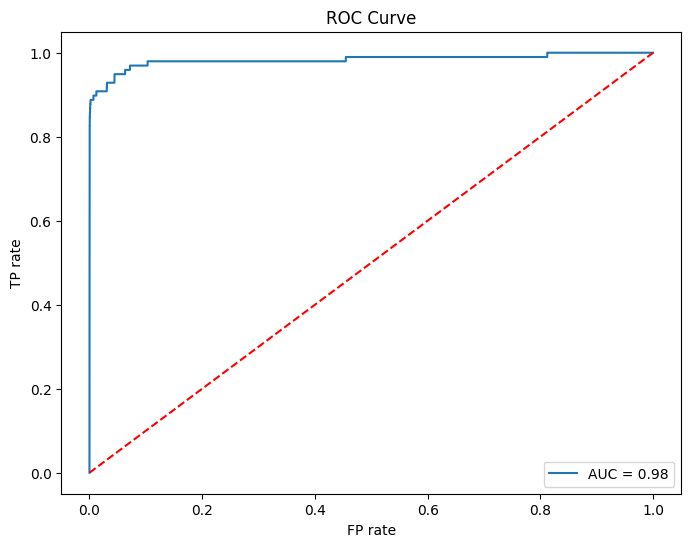

In [ ]:
y_pred = xgb.predict_proba(X_test)[:,1]
fp_r, tp_r, t = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fp_r, tp_r)
print(auc)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()